# Mesh Visualization with PyRender

This notebook loads and visualizes 3D meshes from the LOD dataset using PyRender and matplotlib for display.

In [1]:
import numpy as np
import trimesh
import pyrender
import matplotlib.pyplot as plt
import os

os.environ["PYOPENGL_PLATFORM"] = "egl"
os.environ["LIBGL_ALWAYS_SOFTWARE"] = "1"

#Config for debugging
SHOW_Y_AXIS = True

In [ ]:
import numpy as np
import trimesh
import pyrender
import matplotlib.pyplot as plt
from trimesh.visual.texture import TextureVisuals

# Load your scene
lod_3_scene = trimesh.load("/home/jeans/downloads/0/lod3.obj")

# Iterate over every geometry in the scene
for name, geom in lod_3_scene.geometry.items():

    # Try to grab existing UVs
    existing_uv = getattr(geom.visual, 'uv', None)

    # If there is no UV map (or it's empty), insert a dummy one
    if existing_uv is None or len(existing_uv) == 0:
        # Compute a simple UV from X,Y vertex coords
        verts2 = geom.vertices[:, :2]
        uv = (verts2 - verts2.min(axis=0)) / np.ptp(verts2, axis=0)

        # Create a 1×1 white placeholder image
        placeholder = np.ones((1, 1, 3), dtype=np.uint8) * 255

        # Assign the new TextureVisuals (preserves only uv & image)
        geom.visual = TextureVisuals(uv=uv, image=placeholder)

# Now the rest is unchanged:
lod_3_scene.apply_translation(-lod_3_scene.centroid)
pyr_scene = pyrender.Scene.from_trimesh_scene(lod_3_scene)
pyr_scene.ambient_light = np.array([0.1, 0.1, 0.1])

renderer = pyrender.OffscreenRenderer(800, 600)
camera  = pyrender.PerspectiveCamera(yfov=np.pi/2.0)
pyr_scene.add(camera, pose= np.array([[1, 0, 0, 0],
                                                  [0, 1, 0, 0],
                                                  [0, 0, 1, 200],
                                                  [0, 0, 0, 1]]))

color, depth = renderer.render(pyr_scene)

plt.figure(figsize=(10,10))
plt.imshow(color)
plt.axis('off')
plt.show()


/home/jeans/miniconda3/envs/3dline/lib/python3.10/site-packages/trimesh/grouping.py:99: RuntimeWarning: invalid value encountered in cast
  stacked = np.column_stack(stacked).round().astype(np.int64)


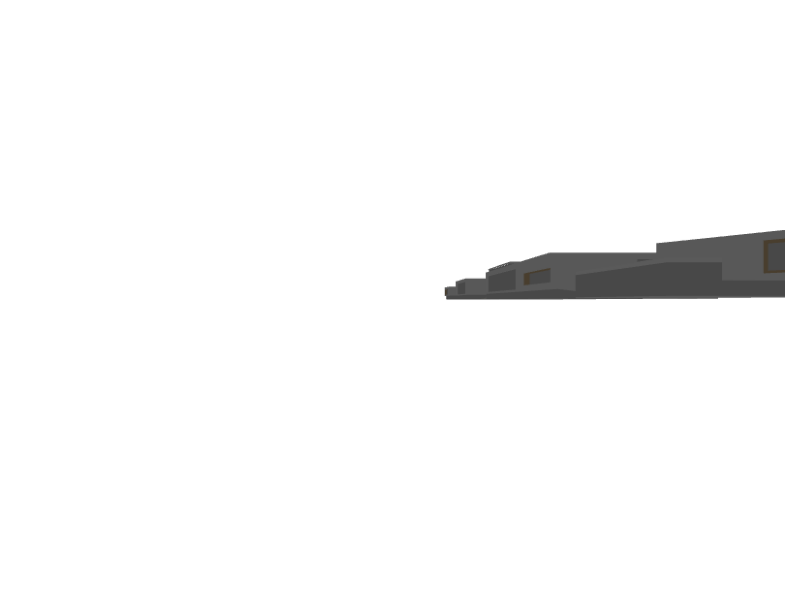

In [3]:
lod_3_scene = trimesh.load("/home/jeans/win/aaaJAIST/resources/LOD_data_50/0/negro_lod3.obj")
#recalculate normal
# trimesh.repair.fix_normals(lod)

#extract the mesh from the scene
# lod_3_mesh = trimesh.util.concatenate(list(lod_3_scene.geometry.values()))
# trimesh.repair.fix_normals(lod_3_mesh)

# lod_3_scene = trimesh.Scene()
# lod_3_scene.add_geometry(lod_3_mesh)
# tranlate to origin
# lod_3_scene.apply_translation(-lod_3_scene.centroid)

#show in pyrender
pyrender_scene = pyrender.Scene.from_trimesh_scene(lod_3_scene)
# add a uniform ambient term (rgb)
pyrender_scene.ambient_light = np.array([0.1, 0.1, 0.1])
#show the scene
renderer = pyrender.OffscreenRenderer(800, 600)
#add camera
camera = pyrender.PerspectiveCamera(yfov=np.pi / 2.0)
pyrender_scene.add(camera, pose=np.eye(4))

color, depth = renderer.render(pyrender_scene)


plt.figure(figsize=(10, 10))
plt.imshow(color)
plt.axis('off')
plt.show()

    

In [4]:
from trimesh.visual.material import PBRMaterial
import numpy as np

# --- load your scene & concat into a single mesh as before ---
lod_3_scene = trimesh.load("/home/jeans/win/aaaJAIST/resources/LOD_data_50/0/lod3.obj")
lod_3_mesh  = trimesh.util.concatenate(list(lod_3_scene.geometry.values()))
trimesh.repair.fix_normals(lod_3_mesh)

# --- now force opaque materials ---
# If your mesh still has a PBRMaterial on its visual:
mat = lod_3_mesh.visual.material
if isinstance(mat, PBRMaterial):
    # 1) ignore all alpha
    mat.alphaMode = "OPAQUE"
    # 2) ensure global alpha = 1
    mat.baseColorFactor[3] = 1.0

    # 3) if there's a texture with RGBA data, drop its A channel
    tex = mat.baseColorTexture
    if tex is not None:
        img = tex.image
        # only RGB, no A
        if img.shape[-1] == 4:
            tex.image = img[..., :3]

# --- build a fresh scene and show it in trimesh (or pyrender) ---
opaque_scene = trimesh.Scene()
opaque_scene.add_geometry(lod_3_mesh)
opaque_scene.show()


In [5]:
import numpy as np
import trimesh
import pyrender
import matplotlib.pyplot as plt

# load your .obj
lod_3_scene = trimesh.load("/home/jeans/downloads/0/lod3.obj")

# --- INSERT DUMMY UVs ON EACH GEOMETRY ---
for name, geom in lod_3_scene.geometry.items():
    # compute a simple UV from the X,Y coords of each vertex
    verts2 = geom.vertices[:, :2]
    uv = (verts2 - verts2.min(axis=0)) / np.ptp(verts2, axis=0)

    # 1×1 white placeholder image
    placeholder = np.ones((1, 1, 3), dtype=np.uint8) * 255

    from trimesh.visual.texture import TextureVisuals
    geom.visual = TextureVisuals(uv=uv, image=placeholder)
# — end dummy-UV hack —

# now you can translate & pack into a Pyrender scene safely
lod_3_scene.apply_translation(-lod_3_scene.centroid)
pyr_scene = pyrender.Scene.from_trimesh_scene(lod_3_scene)
pyr_scene.ambient_light = np.array([0.1, 0.1, 0.1])

renderer = pyrender.OffscreenRenderer(800, 600)
camera  = pyrender.PerspectiveCamera(yfov=np.pi/2.0)
pyr_scene.add(camera, pose=np.eye(4))

color, depth = renderer.render(pyr_scene)

plt.figure(figsize=(10,10))
plt.imshow(color)
plt.axis('off')
plt.show()


GLError: GLError(
	err = 12296,
	baseOperation = eglMakeCurrent,
	cArguments = (
		<OpenGL._opaque.EGLDisplay_pointer object at 0x7a2d183707c0>,
		<OpenGL._opaque.EGLSurface_pointer object at 0x7a2d28ea5ec0>,
		<OpenGL._opaque.EGLSurface_pointer object at 0x7a2d28ea5ec0>,
		<OpenGL._opaque.EGLContext_pointer object at 0x7a2d18370b40>,
	),
	result = 0
)